In [1]:
import sys
if 'src' not in sys.path:
    sys.path.append('src')
from SimpleEC import *
from operators import *
from sklearn.metrics import mean_absolute_error

In [2]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.knr import KNNR, wsplit, RidgeGen

### Cargamos dataset
El dataset contiene los precios de apertura y cierre del ETF VOO del 2 de enero del 2014 al 21 de octubre del 2022.



Otros datasets interesantes del S&P 500 y dowjons 

http://lib.stat.cmu.edu/datasets/djdc0093

http://lib.stat.cmu.edu/datasets/spdc2693

http://lib.stat.cmu.edu/datasets/

In [3]:
data = pd.read_csv('assets/VOO-ampm.csv')


<AxesSubplot:>

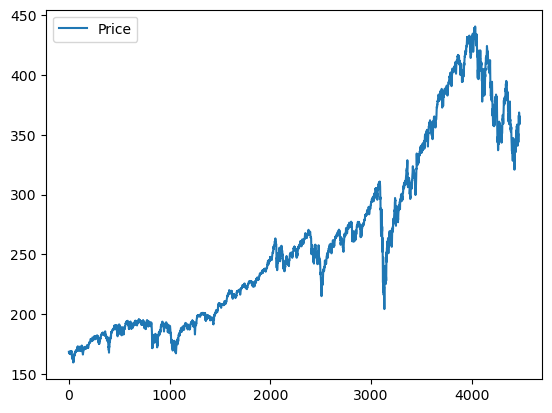

In [4]:
data.plot()

In [5]:
X,Y=wsplit(data.Price,10,1)
x=X[:-100]
y=Y[:-100]
xv=X[-100:-30]
yv=Y[-100:-30]
xt=X[-30:]
yt=Y[-30:]

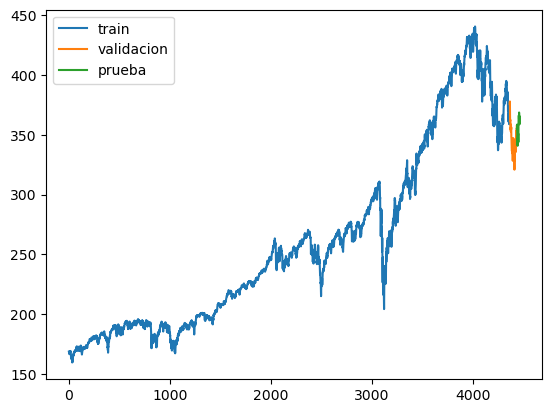

In [6]:
n=len(y)
nv=len(yv)
nt=len(yt)
plt.plot(range(0,n),y, label='train')
plt.plot(range(n,n+nv),yv, label='validacion')
plt.plot(range(n+nv,n+nv+nt),yt, label='prueba')
plt.legend(loc=0)

### Acercamiento a la etapa de validación y prueba.

Text(0, 0.5, 'USD')

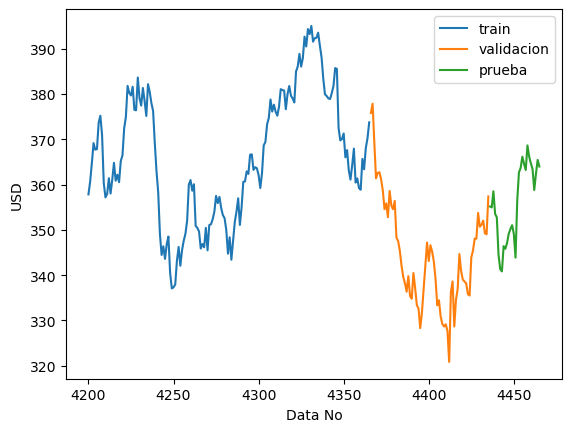

In [7]:
n=len(y)
nv=len(yv)
nt=len(yt)
plt.plot(range(4200,n),y[4200:], label='train')
plt.plot(range(n,n+nv),yv, label='validacion')
plt.plot(range(n+nv,n+nv+nt),yt, label='prueba')
plt.legend(loc=0)
plt.xlabel('Data No')
plt.ylabel('USD')


In [8]:
reg = Ridge()
reg.fit(x,y)
reg.score(xv,yv)

0.8601933197090434

In [9]:
yp=reg.predict(xv)
mean_absolute_error(yv,yp)

3.329188262764544

In [10]:
reg = Ridge(alpha=0.4)
reg.fit(x,y)
reg.score(xv,yv)

0.8601930342093974

3.3291744347376007


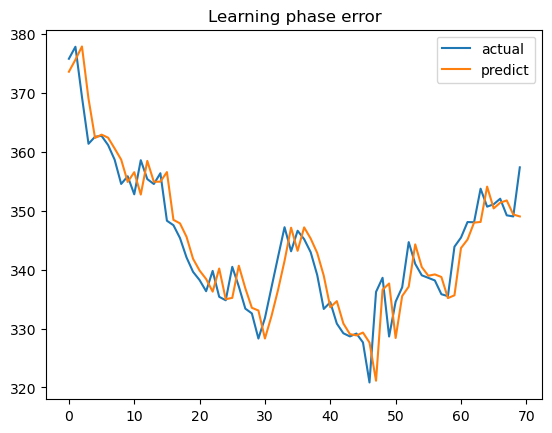

In [11]:
yp = reg.predict(xv)
print(mean_absolute_error(yv, yp))
plt.plot(yv, label='actual')
plt.plot(yp, label='predict') 
plt.title("Learning phase error")
plt.legend()


Score de predicción: 
0.7672952630799116
MAE:
3.0581232301861556


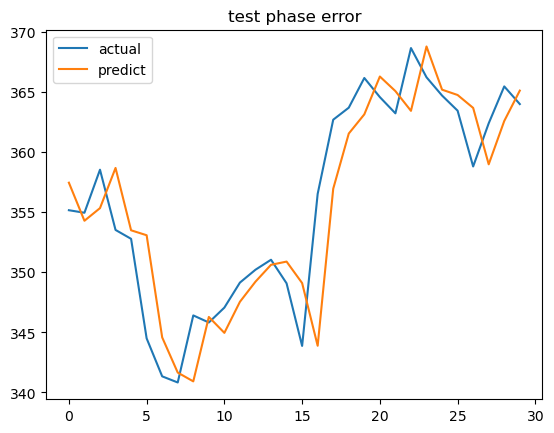

In [12]:
breg = reg.fit(X[:-30], Y[:-30])
mean_absolute_error(yt, reg.predict(xt))
print("Score de predicción: ")
print(reg.score(xt, yt))
yp1 = reg.predict(xt)
print("MAE:")
print(mean_absolute_error(yt, yp1))
plt.plot(yt, label='actual')
plt.plot(yp1, label='predict')
plt.title("test phase error")
plt.legend()


## Resultados Ridge sin optimización
| Algoritmo Regresión  | Score Validación | Mean Absolute Error Validación | Score Test | Mean Absolute Error Test |
|----------------------|------------------|--------------------------------|------------|--------------------------|
| Ridge                | 0.860193         | 3.329188                       | 0.767295   | 3.058123    



## Optimización de regresor

In [13]:
from sklearn.metrics import mean_squared_error as mse
from src.SimpleEC import SimpleEC

def fitpred(m,tau,**kwargs):
    m,tau=int(m),int(tau)

    y=kwargs['y']
    n=kwargs['n']
    # print(y.shape)
    data,target=wsplit(y,m,tau)
    # print(data.shape,target.shape)
    train = data[:-n]
    y_train = target[:-n]
    y_v = target[-n:]
    #print(y_train.shape,y_test.shape)
    # print(n)
    knr = RidgeGen(m=m, tau=tau)
    knr.fit(train,y_train)
    y_pred=knr.predict(n)
    y_pred=np.nan_to_num(y_pred,np.mean(y_pred))
    return mse(y_v,y_pred)


In [14]:
fitpred(m=10,tau= 1,y=Y, n=24)


212.83226900883884

In [15]:
ec=SimpleEC(fitpred,[(1,32),(1,32)], population_size=64,
            code_size=[5,5], **{'y':Y[:-24],'n':24})

In [16]:
best,avg=ec.evolve(t=10)

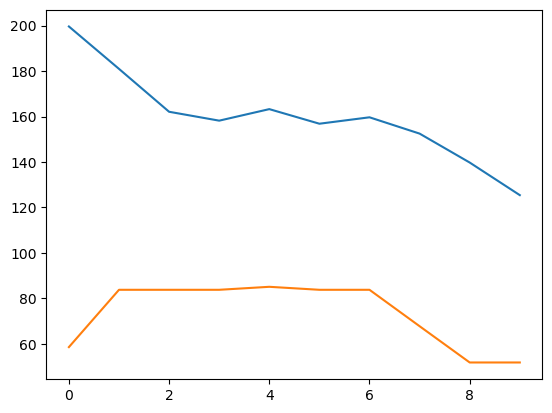

In [17]:
plt.plot(best)
plt.plot(avg)


In [18]:
[ec._gray_to_real(gcode, b) for gcode,b in zip(ec.population[0].code,ec.bounds)]


[32.0, 29.0]

In [65]:
xt,yt=wsplit(Y[:-30],32,29)

In [69]:
print(yt)
reg = RidgeGen(32,29,32).fit(xt,yt)
yp = reg.predict(32)

[191.479996 190.389999 189.360001 ... 349.230011 349.040009 357.380005]


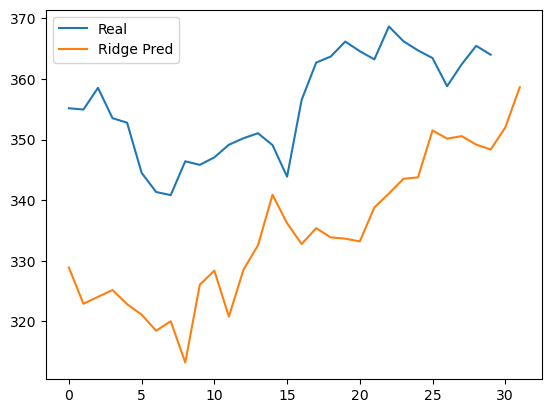

In [70]:
plt.plot(Y[-30:], label ="Real")
plt.plot(yp, label="Ridge Pred")
# plt.title("test phase error")
plt.legend()